In [1]:
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as mp
from scipy import signal
%matplotlib inline

In [2]:
def dft(y):
    N = len(y)
    c = np.zeros(N//2 + 1, complex)
    n = np.arange(0,N)
    for k in range(N//2 + 1):
        c[k] = sum(y*np.exp(-1j*2*np.pi*k*n/N))
    return c

<b>Exercise 7.1: Fourier transforms of simple functions</b>

Write Python programs to calculate the coefficients in the discrete Fourier transforms of the following periodic functions sampled at $N = 1000$ evenly spaced points, and make plots of their amplitudes similar to the plot shown in Fig. 7.4:

a) A single cycle of a square-wave with amplitude 1<br />
b) The sawtooth wave $y_n = n$<br />
c) The modulated sine wave $y_n = \sin(\frac{\pi n}{N})\sin(\frac{20\pi n}{N})$

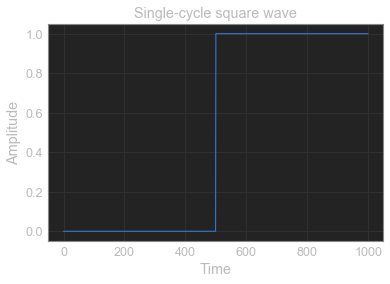

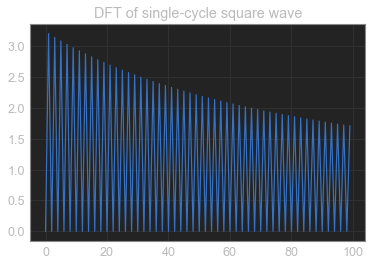

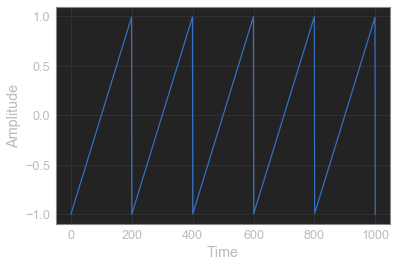

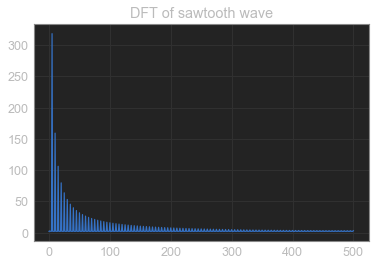

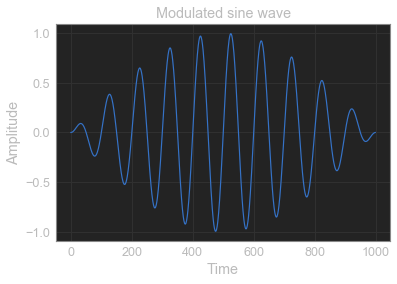

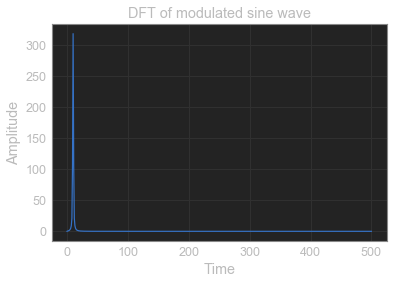

In [3]:
N = 1000
y1 = np.ones(N)
y1[:N//2] = 0
mp.plot(y1)
mp.title("Single-cycle square wave")
mp.ylabel("Amplitude")
mp.xlabel("Time")
mp.show()

c1 = dft(y1)
mp.plot(abs(c1[100:200]))
mp.title("DFT of single-cycle square wave")
mp.show()

x2 = np.linspace(0,1000,N)
y2 = signal.sawtooth(2*np.pi*5*x2)
mp.plot(x2,y2)
mp.ylabel("Amplitude")
mp.xlabel("Time")
mp.show()

c2 = dft(y2)
mp.plot(abs(c2))
mp.title("DFT of sawtooth wave")
mp.show()

n = np.arange(N)
y3 = np.sin(np.pi*n/N)*np.sin(20*np.pi*n/N)
mp.plot(y3)
mp.ylabel("Amplitude")
mp.xlabel("Time")
mp.title("Modulated sine wave")
mp.show()

c3 = dft(y3)
mp.plot(abs(c3))
mp.ylabel("Amplitude")
mp.xlabel("Time")
mp.title("DFT of modulated sine wave")
mp.show()

<b>Exercise 7.2: Detecting periodicity</b>

In the on-line resources there is a file called sunspots.txt, which contains the observed number of sunspots on the Sun for each month since January 1749. The file contains two columns of numbers, the first representing the month and the second being the sunspot number.

a) Write a program that reads the data in the file and makes a graph of sunspots as a function of time. You should see that the number of sunspots has fluctuated on a regular cycle for as long as observations have been recorded. Make an estimate of the length of the cycle in months.

b) Modify your program to calculate the Fourier transform of the sunspot data and then make a graph of the magnitude squared $|c_k|^2$ of the Fourier coefficients as a function of $k$ — also called the power spectrum of the sunspot signal. You should see that there is a noticeable peak in the power spectrum at a nonzero value of k. The appearance of this peak tells us that there is one frequency in the Fourier series that has a higher
amplitude than the others around it—meaning that there is a large sine-wave term with this frequency, which corresponds to the periodic wave you can see in the original data.

c) Find the approximate value of $k$ to which the peak corresponds. What is the period of the sine wave with this value of $k$? You should find that the period corresponds roughly to the length of the cycle that you estimated in part (a).

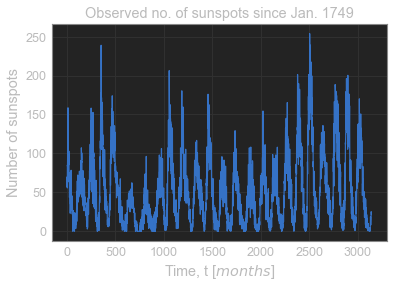

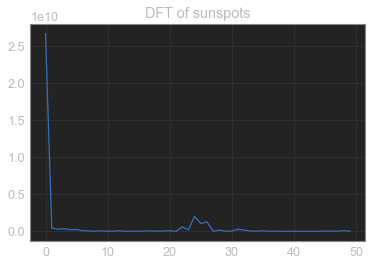

Estimated period ~ 130 months ( 10.833333333333334  years)
Estimated k ~ 24
Period = 130.95833333333331 months


In [5]:
spots = np.loadtxt("Chapter 7 Resources/sunspots.txt", float)
y = spots[:,1]
mp.plot(y)
mp.xlabel("Time, t [$months$]")
mp.ylabel("Number of sunspots")
mp.title("Observed no. of sunspots since Jan. 1749")
mp.show()

c = dft(y)
power = c.real**2 + c.imag**2
mp.plot(power[0:50])
mp.title("DFT of sunspots")
mp.show()

solarmax1 = np.where(y == max(y[1000:1100]))
solarmax2 = np.where(y == max(y[1100:1200]))
period = int(solarmax2[0]) - int(solarmax1[0])
print("Estimated period ~", period, "months (", period/12, " years)")
est_k = np.where(power == max(power[10:]))
print("Estimated k ~", int(est_k[0]))

N = len(y)
freq = int(est_k[0])/N
print("Period =", 1/freq, "months")

<b>Exercise 7.3: Fourier transforms of musical instruments</b>

In the on-line resources you will find files called piano.txt and trumpet.txt, which contain data representing the waveform of a single note, played on, respectively, a piano and a trumpet.

a) Write a program that loads a waveform from one of these files, plots it, then calculates its discrete Fourier transform and plots the magnitudes of the first 10,000 coefficients in a manner similar to Fig. 7.4. Note that you will have to use a fast Fourier transform for the calculation because there are too many samples in the files to do the transforms the slow way in any reasonable amount of time. Apply your program to the piano and trumpet waveforms and discuss briefly what one can conclude about the sound of the piano and trumpet from the plots of Fourier coefficients.

b) Both waveforms were recorded at the industry-standard rate of 44,100 samples per second and both instruments were playing the same musical note when the recordings were made. From your Fourier transform results calculate what note they were playing (Hint: The musical note middle C has a frequency of 261Hz.)

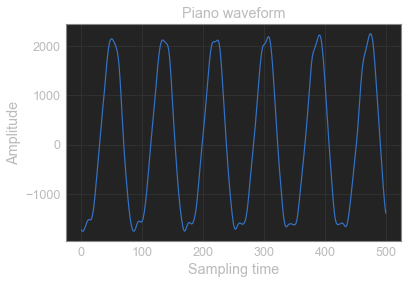

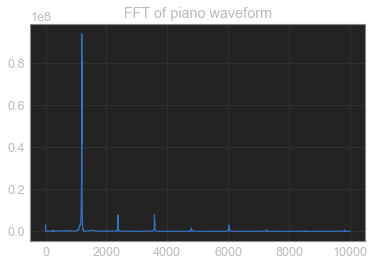

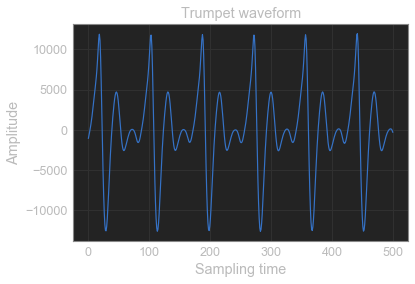

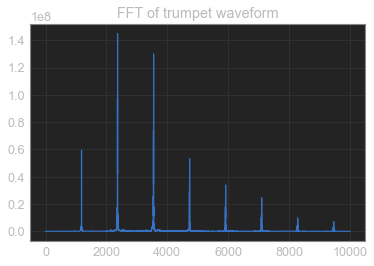

In [14]:
piano = np.loadtxt("Chapter 7 Resources/piano.txt", float)
trumpet = np.loadtxt("Chapter 7 Resources/trumpet.txt", float)

mp.plot(piano[40000:40500])
mp.title("Piano waveform")
mp.xlabel("Sampling time")
mp.ylabel("Amplitude")
mp.savefig("piano.png",dpi=300)
mp.show()

cp = fft.rfft(piano)
mp.plot(abs(cp[:10000]))
mp.title("FFT of piano waveform")
mp.show()

mp.plot(trumpet[40000:40500])
mp.title("Trumpet waveform")
mp.xlabel("Sampling time")
mp.ylabel("Amplitude")
mp.savefig("trumpet.png",dpi=300)
mp.show()

ct = fft.rfft(trumpet)
mp.plot(abs(ct[:10000]))
mp.title("FFT of trumpet waveform")
mp.show()

From the plots of the FFTs, we can see that the first nonzero peak is the note being played, and the following peaks are most probably the harmonics.

In [114]:
samprate = 44100

p_peak = np.argmax(cp)
N = len(piano)
freq = p_peak*samprate/N
print("Piano frequency =", freq, "Hz")

t_peak = np.argmax(ct)
N = len(trumpet)
freq = p_peak*samprate/N
print("Trumpet frequency =", freq, "Hz")

print("Note played: C5")

Piano frequency = 525.231 Hz
Trumpet frequency = 525.231 Hz
Note played: C5


<b>Exercise 7.4: Fourier filtering and smoothing</b>

In the on-line resources you’ll find a file called dow.txt. It contains the daily closing value for each business day from late 2006 until the end of 2010 of the Dow Jones Industrial Average, which is a measure of average prices on the US stock market. Write a program to do the following:

a) Read in the data from dow.txt and plot them on a graph.

b) Calculate the coefficients of the discrete Fourier transform of the data using the function rfft from numpy.fft, which produces an array of $\frac{1}{2}N + 1$ complex numbers.

c) Now set all but the first 10% of the elements of this array to zero (i.e., set the last 90% to zero but keep the values of the first 10%).

d) Calculate the inverse Fourier transform of the resulting array, zeros and all, using the function irfft, and plot it on the same graph as the original data. You may need to vary the colors of the two curves to make sure they both show up on the graph. Comment on what you see. What is happening when you set the Fourier coefficients to zero?

e) Modify your program so that it sets all but the first 2% of the coefficients to zero and run it again.

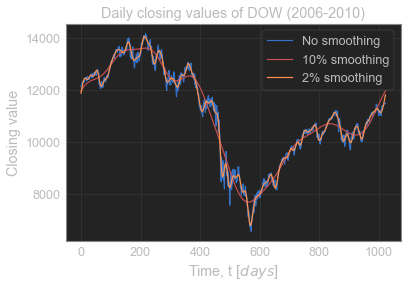

In [17]:
dow = np.loadtxt("Chapter 7 Resources\dow.txt", float)
N = len(dow)

mp.plot(dow, "b", label="No smoothing")
mp.title("Daily closing values of DOW (2006-2010)")
mp.xlabel("Time, t [$days$]")
mp.ylabel("Closing value")

c = fft.rfft(dow)
c[N//(N//10):] = 0
y10 = fft.irfft(c)
mp.plot(y10, "r", label="10% smoothing")

c = fft.rfft(dow)
c[N//(N//50):] = 0
y2 = fft.irfft(c)
mp.plot(y2, "y", label="2% smoothing")

mp.legend()
mp.show()

<b>Exercise 7.5:</b>

The function $f(t)$ represents a square-wave with amplitude 1 and frequency 1 Hz. Let us attempt to smooth this function using a Fourier transform, as we did in the previous exercise. Write a program that creates an array of $N = 1000$ elements containing a thousand equally spaced samples from a single cycle of this square-wave. Calculate the discrete Fourier transform of the array. Now set all but the first ten Fourier coefficients to zero, then invert the Fourier transform again to recover the smoothed signal. Make a plot of the result and on the same axes show the original square-wave as well. You should find that the signal is not simply smoothed--there are artifacts, wiggles, in the results. Explain briefly where these come from. Artifacts similar to these arise when Fourier coefficients are discarded in audio and visual compression schemes like those described in Section 7.3.1 and are the primary source of imperfections
in digitally compressed sound and images.

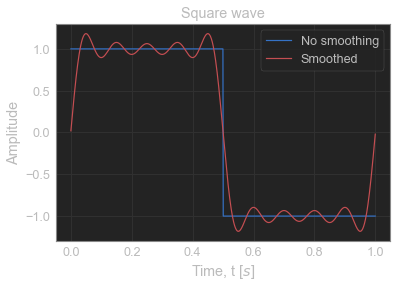

In [18]:
N = 1000
y1 = np.ones(N)*-1
x1 = np.linspace(0,1,N)
y1[:N//2] = 1
mp.plot(x1,y1, "b", label="No smoothing")

c = dft(y1)
c[11:] = 0
y2 = fft.irfft(c)
mp.plot(x1,y2, "r", label="Smoothed")

mp.title("Square wave")
mp.ylabel("Amplitude")
mp.xlabel("Time, t [$s$]")
mp.legend()
mp.show()

<b>Exercise 7.9: Image deconvolution</b>

a) On the web site you will find a file called blur.txt that contains a grid of values representing brightness on a black-and-white photo—a badly out-of-focus one that has been deliberately blurred using a Gaussian point spread function of width $\sigma = 25$. Write a program that reads the grid of values into a two-dimensional array of real numbers and then draws the values on the screen of the computer as a density plot. You should see
the photo appear. If you get something wrong it might be upside-down. Work with the details of your program until you get it appearing correctly. (Hint: The picture has the sky, which is bright, at the top and the ground, which is dark, at the bottom.)

b) Write another program that creates an array, of the same size as the photo, containing a grid of samples drawn from the Gaussian $f(x,y)$ above with $\sigma = 25$. Make a density
plot of these values on the screen too, so that you get a visualization of your point spread function. Remember that the point spread function is periodic (along both axes), which
means that the values for negative x and y are repeated at the end of the interval. Since the Gaussian is centered on the origin, this means there should be bright patches in each of the four corners of your picture.

c) Combine your two programs and add Fourier transforms using the functions rfft2 and irfft2 from numpy.fft, to make a program that does the following:

i) Reads in the blurred photo<br />
ii) Calculates the point spread function<br />
iii) Fourier transforms both<br />
iv) Divides one by the other<br />
v) Performs an inverse transform to get the unblurred photo<br />
vi) Displays the unblurred photo on the screen<br />

When you are done, you should be able to make out the scene in the photo, although probably it will still not be perfectly sharp. Hint: One thing you’ll need to deal with is what happens when the Fourier transform of the point spread function is zero, or close to zero. In that case if you divide by it you’ll get
an error (because you can’t divide by zero) or just a very large number (because you’re dividing by something small). A workable compromise is that if a value in the Fourier transform of the point spread function is smaller than a certain amount $\epsilon$ you don’t divide by it--just leave that coefficient alone. The value of $\epsilon$ is not very critical but a reasonable value seems to be $10^{-3}$.

d) Bearing in mind this last point about zeros in the Fourier transform, what is it that limits our ability to deblur a photo? Why can we not perfectly unblur any photo and make it completely sharp?

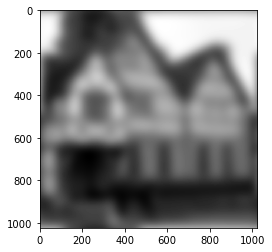

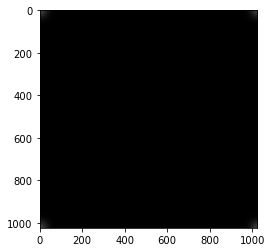

NameError: name 'af' is not defined

In [152]:
blur = np.loadtxt("Chapter 7 Resources-20180404/blur.txt")
mp.gray()
mp.imshow(blur)
mp.show()

sigma = 25
f = lambda x,y: np.exp(-(x**2 + y**2)/2/sigma**2)
gaussian = np.zeros(blur.shape, float)
for i in range(blur.shape[0]):
    for j in range(blur.shape[1]):
        gaussian[i,j] += f(i,j)
        gaussian[-i,-j] += f(i,j)
        gaussian[-i,j] += f(i,j)
        gaussian[i,-j] += f(i,j)
mp.imshow(gaussian)
mp.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 1; dimension is 1024 but corresponding boolean dimension is 513
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 1; dimension is 1024 but corresponding boolean dimension is 513
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  


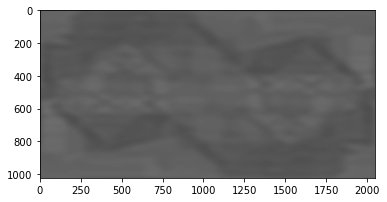

In [173]:
af = []
bf = fft.rfft2(blur)
ff = fft.rfft2(gaussian)
N = bf.shape[0]

af = np.ones((N,N))
af[ff>1e-3] = bf[ff>1e-3]/ff[ff>1e-3]
af[ff<=1e-3] = bf[ff<=1e-3]

a = fft.irfft2(af)
mp.imshow(a)
mp.show()

## Lec 4/5/18

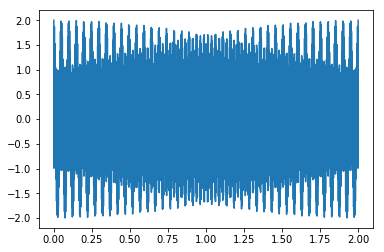

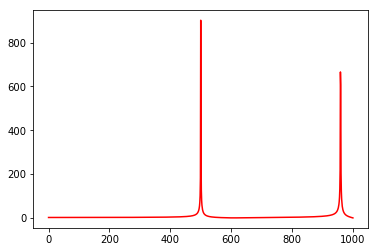

500
959


In [60]:
N = 2000
f1 = 250
f2 = 520
tmin = 0
tmax = 2
t = np.linspace(tmin,tmax,N)
y = np.cos(2*np.pi*f1*t)+np.cos(2*np.pi*f2*t)
mp.plot(t,y)
mp.show()

c = fft.rfft(y)
mp.plot(abs(c), "r")
mp.show()

print(np.argmax(c[1:])+1)
print(np.argmax(c[600:])+600)